In [1]:
import csv
import numpy as np
import pandas as pd
from numpy import array
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from datetime import date
import datetime
import os

In [2]:
# Create folder to save results in
identify = 'ClassificationSKL_28_RadioStation+Plays_Stand'
folder_name = '/Users/clausholm/Documents/Python/Master_thesis/Data/test_results/'+identify
#os.mkdir(folder_name)

# Load Dataset
# Radio Station Dataset
df = pd.read_csv('database/RadioStation28days.csv', sep=';', index_col=0, decimal=',')

df = df.drop(columns=['Slope28', 'ArtistPopularity', 'Slope56','FirstWeek'])
df

,0-24_Charts_Pop_Rock,1/DEUTSCH,100'5 Das Hitradio,103.7 UnserDing,103.7 UnserDing Schwarz,103.7 UnserDing Zukunft,104.6 RTL,104.6 RTL Black,104.6 RTL Neue Hits,104.6 RTL Rock & Pop,...,rt1 dance,rt1 deutsch,rt1 in the mix,rt1 kids,rt1 number ones,rt1 relax,rt1 rock,rt1 top 40,rt1 weekend,cluster
Adel_Tawil_-_Unsere_Lieder,0,0,0,0,0,0,66,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Alec_Benjamin_Feat._Alessia_Cara_-_Let_Me_Down_Slowly,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Andreas Bourani - Auf uns,0,0,0,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Annenmaykantereit - Marie,0,0,0,24,0,0,0,0,0,0,...,0,93,0,0,0,0,0,0,0,2
Ariana Grande - 7 rings,0,0,0,78,0,326,34,262,150,0,...,0,0,0,0,0,0,0,0,0,5
Ava Max - So Am I,0,0,0,47,0,0,51,0,165,0,...,0,0,0,0,0,0,0,0,0,4
Ava Max - Sweet but Psycho,0,0,0,58,0,0,65,0,0,0,...,0,0,3,0,0,0,0,0,0,4
Bausa - Was Du Liebe nennst,0,0,0,40,21,0,0,0,0,0,...,0,0,0,0,0,0,0,70,0,5
C Arma - Yapma - Radio Edit,0,0,0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Calvin Harris & Rag'n'bone Man - Giant,0,0,0,87,0,0,125,0,96,0,...,0,0,0,0,0,0,0,0,0,4


,0-24_Charts_Pop_Rock,1/DEUTSCH,100'5 Das Hitradio,103.7 UnserDing,103.7 UnserDing Schwarz,103.7 UnserDing Zukunft,104.6 RTL,104.6 RTL Black,104.6 RTL Neue Hits,104.6 RTL Rock & Pop,...,rt1 number ones,rt1 relax,rt1 rock,rt1 top 40,rt1 weekend,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
Adel_Tawil_-_Unsere_Lieder,0,0,0,0,0,0,66,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Alec_Benjamin_Feat._Alessia_Cara_-_Let_Me_Down_Slowly,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Annenmaykantereit - Marie,0,0,0,24,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Ariana Grande - 7 rings,0,0,0,78,0,326,34,262,150,0,...,0,0,0,0,0,0,0,0,0,1
Ava Max - Sweet but Psycho,0,0,0,58,0,0,65,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Bausa - Was Du Liebe nennst,0,0,0,40,21,0,0,0,0,0,...,0,0,0,70,0,0,0,0,0,1
C Arma - Yapma - Radio Edit,0,0,0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Calvin Harris & Rag'n'bone Man - Giant,0,0,0,87,0,0,125,0,96,0,...,0,0,0,0,0,0,0,0,1,0
Childish Gambino - This Is America,2,0,0,11,0,223,0,0,0,0,...,0,0,0,76,0,0,1,0,0,0
Chris Brown - Undecided,0,0,0,4,193,0,0,232,113,0,...,0,0,0,0,0,0,1,0,0,0


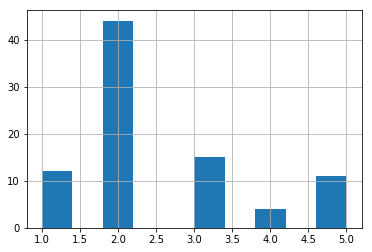

In [3]:

# Split into train and test set 
test_songs = ['Katy Perry - Never Really Over' , 
              'Taylor Swift - You Need To Calm Down', 
              'Shawn Mendes & Camila Cabello - Seniorita', 
              'Ava Max - So Am I', 
              'Andreas Bourani - Auf uns', 
              'Meduza feat. Goodboys - Piece Of Your Heart', 
              'Pietro Lombardi - Nur Ein Tanz', 
              'Loud Luxury feat. brando - Body', 
              'Mark Forster - Sowieso', 
              'Camila Cabello feat. Young Thug - Havana',  ]

# create scaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

# Test
test = df.loc[ test_songs , : ]

# Train
train = df.drop(test_songs)

# Show train set
train['cluster'].hist();train.head()

# For Train set, use get_dummies to create columns for each stars and show whther there is a value or not (0 or 1)  
train = pd.get_dummies(train, columns = ['cluster'])

train

,0-24_Charts_Pop_Rock,1/DEUTSCH,100'5 Das Hitradio,103.7 UnserDing,103.7 UnserDing Schwarz,103.7 UnserDing Zukunft,104.6 RTL,104.6 RTL Black,104.6 RTL Neue Hits,104.6 RTL Rock & Pop,...,rt1 number ones,rt1 relax,rt1 rock,rt1 top 40,rt1 weekend,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
Katy Perry - Never Really Over,0,0,0,65,0,481,26,0,202,0,...,0,0,0,0,0,0,0,0,0,1
Taylor Swift - You Need To Calm Down,0,0,0,38,0,189,70,0,180,0,...,0,0,0,0,0,0,0,0,0,1
Shawn Mendes & Camila Cabello - Seniorita,0,0,0,107,0,600,156,0,325,0,...,0,2,0,209,0,0,0,0,1,0
Ava Max - So Am I,0,0,0,47,0,0,51,0,165,0,...,0,0,0,0,0,0,0,0,1,0
Andreas Bourani - Auf uns,0,0,0,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Meduza feat. Goodboys - Piece Of Your Heart,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Pietro Lombardi - Nur Ein Tanz,0,0,0,0,0,0,0,0,39,0,...,0,0,0,0,0,0,1,0,0,0
Loud Luxury feat. brando - Body,8,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Mark Forster - Sowieso,0,0,2,10,0,0,1,0,45,0,...,0,0,0,0,22,1,0,0,0,0
Camila Cabello feat. Young Thug - Havana,0,0,0,26,0,0,1,0,0,0,...,0,0,0,253,0,1,0,0,0,0


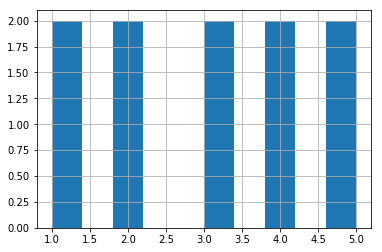

In [4]:
# Show train set
test['cluster'].hist();test.head()

# For Test set, use get_dummies to create columns for each stars and show whther there is a value or not (0 or 1)
test = pd.get_dummies(test, columns = ['cluster'])

test

In [5]:
# prepare configuration for cross validation test harness
seed = 7

max_iter = 10000
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=max_iter)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier(n_estimators=100, random_state=0)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))
models.append(('MLP', MLPClassifier(alpha=1, max_iter=max_iter, hidden_layer_sizes=(100), early_stopping=True)))
models.append(('AdaB', AdaBoostClassifier()))     
models.append(('GP', GaussianProcessClassifier(1.0 * RBF(1.0))))
models.append(('QD', QuadraticDiscriminantAnalysis()))


In [6]:
class_names = ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5']
scores = []
preds = np.zeros((len(test), len(class_names)))

train_values = train.drop(columns=['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5']) #.iloc[:, 0:n_steps_in]
test_values = test.drop(columns=['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5']) #.iloc[:, 0:n_steps_in]
train_values

,0-24_Charts_Pop_Rock,1/DEUTSCH,100'5 Das Hitradio,103.7 UnserDing,103.7 UnserDing Schwarz,103.7 UnserDing Zukunft,104.6 RTL,104.6 RTL Black,104.6 RTL Neue Hits,104.6 RTL Rock & Pop,...,rt1 comedy,rt1 dance,rt1 deutsch,rt1 in the mix,rt1 kids,rt1 number ones,rt1 relax,rt1 rock,rt1 top 40,rt1 weekend
Adel_Tawil_-_Unsere_Lieder,0,0,0,0,0,0,66,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alec_Benjamin_Feat._Alessia_Cara_-_Let_Me_Down_Slowly,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Annenmaykantereit - Marie,0,0,0,24,0,0,0,0,0,0,...,0,0,93,0,0,0,0,0,0,0
Ariana Grande - 7 rings,0,0,0,78,0,326,34,262,150,0,...,0,0,0,0,0,0,0,0,0,0
Ava Max - Sweet but Psycho,0,0,0,58,0,0,65,0,0,0,...,0,0,0,3,0,0,0,0,0,0
Bausa - Was Du Liebe nennst,0,0,0,40,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,70,0
C Arma - Yapma - Radio Edit,0,0,0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Calvin Harris & Rag'n'bone Man - Giant,0,0,0,87,0,0,125,0,96,0,...,0,0,0,0,0,0,0,0,0,0
Childish Gambino - This Is America,2,0,0,11,0,223,0,0,0,0,...,0,0,0,0,0,0,0,0,76,0
Chris Brown - Undecided,0,0,0,4,193,0,0,232,113,0,...,0,0,0,0,0,0,0,0,0,0


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

CV score for class cluster_1 is 0.8370279146141216
CV score for class cluster_2 is 0.7438423645320197
CV score for class cluster_3 is 0.7553366174055829
CV score for class cluster_4 is 0.9536124794745485
CV score for class cluster_5 is 0.8830049261083742

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.29      1.00      0.44         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.20        10
   macro avg       0.06      0.20  

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


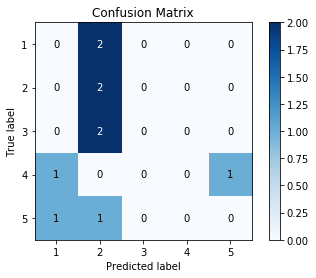

------------------------------------------------------------
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

CV score for class cluster_1 is 0.6863711001642036
CV score for class cluster_2 is 0.58128078817734
CV score for class cluster_3 is 0.6133004926108375
CV score for class cluster_4 is 0.8493431855500821
CV score for class cluster_5 is 0.6982758620689656

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         2
           4       1.00      0.50      0.67         2
           5       0.50      0.50      0.50         2

    accuracy                           0.40        10
   macro avg       0.40      0.40      0.37        10
weighted avg       0.40      0.40      0.37        10


True Cluster      [5, 5, 4, 4, 3, 3, 2, 2,

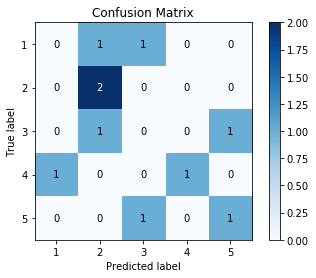

------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

CV score for class cluster_1 is 0.8485221674876847
CV score for class cluster_2 is 0.6637931034482758
CV score for class cluster_3 is 0.814039408866995
CV score for class cluster_4 is 0.9655172413793104
CV score for class cluster_5 is 0.8604269293924466

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.22      1.00      0.36         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.20        10
   macro avg       0.04      0.20      0.07        10
weighted avg       0.04      0.20      0.07        10


True C

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


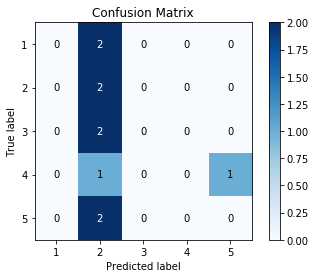

------------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

CV score for class cluster_1 is 0.8255336617405583
CV score for class cluster_2 is 0.7684729064039408
CV score for class cluster_3 is 0.6855500821018062
CV score for class cluster_4 is 0.9540229885057472
CV score for class cluster_5 is 0.7799671592775042

              precision    recall  f1-score   support

           1       0.25      0.50      0.33         2
           2       0.67      1.00      0.80         2
           3       0.33      0.50      0.40         2
           4       0.00      0.00     

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


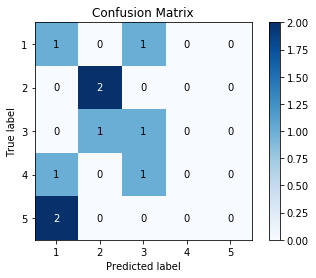

------------------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

CV score for class cluster_1 is 0.8604269293924466
CV score for class cluster_2 is 0.8029556650246304
CV score for class cluster_3 is 0.8255336617405583
CV score for class cluster_4 is 0.9536124794745485
CV score for class cluster_5 is 0.825944170771757

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50    

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


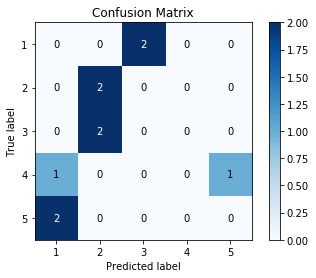

------------------------------------------------------------
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

CV score for class cluster_1 is 0.8485221674876847
CV score for class cluster_2 is 0.8263546798029556
CV score for class cluster_3 is 0.8025451559934318
CV score for class cluster_4 is 0.9536124794745485
CV score for class cluster_5 is 0.8489326765188835

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.67      1.00      0.80 

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


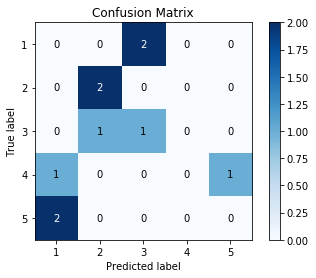

------------------------------------------------------------
GaussianNB(priors=None, var_smoothing=1e-09)

CV score for class cluster_1 is 0.7791461412151067
CV score for class cluster_2 is 0.6280788177339902
CV score for class cluster_3 is 0.7791461412151067
CV score for class cluster_4 is 0.9072249589490969
CV score for class cluster_5 is 0.7204433497536945

              precision    recall  f1-score   support

           1       0.25      1.00      0.40         2
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.30        10
   macro avg       0.15      0.30      0.18        10
weighted avg       0.15      0.30      0.18        10


True Cluster      [5, 5, 4, 4, 3, 3, 2, 2, 1, 1]

Predicted Cluster [1, 1, 1, 1, 2, 1, 2, 1, 1, 1]


/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


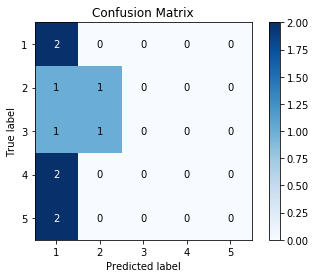

------------------------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

CV score for class cluster_1 is 0.8604269293924466
CV score for class cluster_2 is 0.7212643678160919
CV score for class cluster_3 is 0.8255336617405583
CV score for class cluster_4 is 0.9536124794745485
CV score for class cluster_5 is 0.8723316912972084

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.29      1.00      0.44         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.20        10
   macro avg       0.06      0.20      0.09        10

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


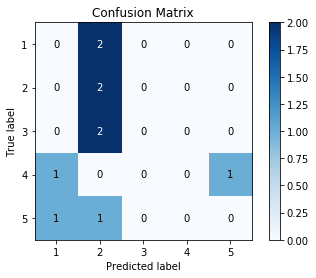

------------------------------------------------------------
MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

CV score for class cluster_1 is 0.6161740558292282
CV score for class cluster_2 is 0.7791461412151067
CV score for class cluster_3 is 0.4802955665024631
CV score for class cluster_4 is 0.6855500821018062
CV score for class cluster_5 is 0.722495894909688

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      1.00      0.50         2
 

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


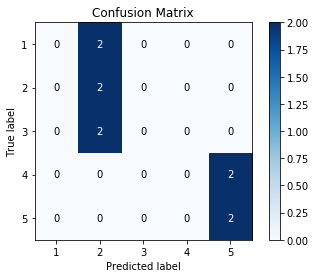

------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

CV score for class cluster_1 is 0.8485221674876847
CV score for class cluster_2 is 0.7914614121510674
CV score for class cluster_3 is 0.743431855500821
CV score for class cluster_4 is 0.9655172413793104
CV score for class cluster_5 is 0.7684729064039408

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.29      1.00      0.44         2
           3       0.00      0.00      0.00         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         2

    accuracy                           0.30        10
   macro avg       0.26      0.30      0.22        10
weighted avg       0.26      0.30      0.22        10


True Cluster      [5, 5, 4, 4, 3, 3, 2, 2, 1, 1]

Predicte

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


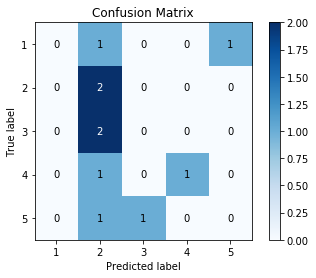

------------------------------------------------------------
GaussianProcessClassifier(copy_X_train=True, kernel=1**2 * RBF(length_scale=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)

CV score for class cluster_1 is 0.8604269293924466
CV score for class cluster_2 is 0.6617405582922824
CV score for class cluster_3 is 0.7898193760262725
CV score for class cluster_4 is 0.9536124794745485
CV score for class cluster_5 is 0.8489326765188835

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.22      1.00      0.36         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy          

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


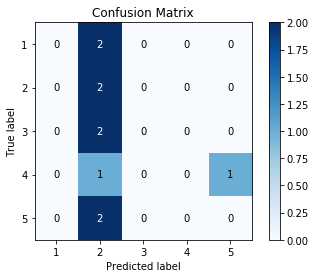

------------------------------------------------------------
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

CV score for class cluster_1 is 0.5591133004926109
CV score for class cluster_2 is 0.5225779967159278
CV score for class cluster_3 is 0.7323481116584566
CV score for class cluster_4 is 0.450328407224959


/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  war

CV score for class cluster_5 is 0.8370279146141216

              precision    recall  f1-score   support

           1       0.25      0.50      0.33         2
           2       0.50      0.50      0.50         2
           3       0.50      0.50      0.50         2
           4       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         2

    accuracy                           0.40        10
   macro avg       0.35      0.40      0.37        10
weighted avg       0.35      0.40      0.37        10


True Cluster      [5, 5, 4, 4, 3, 3, 2, 2, 1, 1]

Predicted Cluster [4, 1, 4, 3, 1, 3, 1, 2, 2, 1]


/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


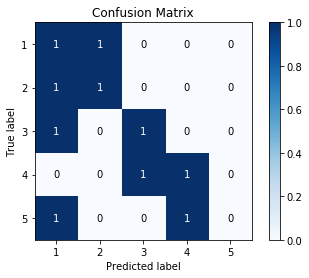

------------------------------------------------------------


,f1-score,precision,recall,support,model,True Cluster,Predicted Cluster
1,0.000000,0.000000,0.0,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[1, 2, 5, 1, 2, 2, 2, 2, 2, 2]"
2,0.444444,0.285714,1.0,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[1, 2, 5, 1, 2, 2, 2, 2, 2, 2]"
3,0.000000,0.000000,0.0,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[1, 2, 5, 1, 2, 2, 2, 2, 2, 2]"
4,0.000000,0.000000,0.0,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[1, 2, 5, 1, 2, 2, 2, 2, 2, 2]"
5,0.000000,0.000000,0.0,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[1, 2, 5, 1, 2, 2, 2, 2, 2, 2]"
accuracy,0.200000,0.200000,0.2,0.2,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[1, 2, 5, 1, 2, 2, 2, 2, 2, 2]"
macro avg,0.088889,0.057143,0.2,10.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[1, 2, 5, 1, 2, 2, 2, 2, 2, 2]"
weighted avg,0.088889,0.057143,0.2,10.0,"LogisticRegression(C=1.0, class_weight=None, d...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[1, 2, 5, 1, 2, 2, 2, 2, 2, 2]"
1,0.000000,0.000000,0.0,2.0,"LinearDiscriminantAnalysis(n_components=None, ...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[3, 5, 4, 1, 5, 2, 2, 2, 2, 3]"
2,0.666667,0.500000,1.0,2.0,"LinearDiscriminantAnalysis(n_components=None, ...","[5, 5, 4, 4, 3, 3, 2, 2, 1, 1]","[3, 5, 4, 1, 5, 2, 2, 2, 2, 3]"


In [7]:
# fit scaler on data
train_values = scaler.fit_transform(train_values)
test_values = scaler.fit_transform(test_values)

dfFinal = pd.DataFrame()

for name, model in models:
    print(model)
    print('')
    
    for i, class_name in enumerate(class_names):
        train_target = train[class_name]    
        cv_score = np.mean(cross_val_score(estimator = model, X = train_values, 
                                          y = train_target, cv = 3, scoring = 'accuracy'))
        scores.append(cv_score)
        print('CV score for class {} is {}'.format(class_name, cv_score))
        model.fit(train_values, train_target)
        preds[:,i] = model.predict_proba(test_values)[:,1]
    print('')
    
    test_clusters = [x + 1 for x in np.argmax(test[class_names].values, axis = 1)] 
    pred_clusters = [x + 1 for x in np.argmax(preds, axis = 1)] 
    
    t = metrics.classification_report(test_clusters, pred_clusters)
    print(t) 
    print('')
    
    print('True Cluster     ', test_clusters)
    print('')
    print('Predicted Cluster', pred_clusters)
    # Plot non-normalized confusion matrix
    skplt.metrics.plot_confusion_matrix(test_clusters, pred_clusters, normalize=False)
    #plt.savefig(folder_name+'/'+ str(name) + '_' + identify + '.png')
    plt.show()
    
    print('------------------------------------------------------------')
    
    # Return classification report as dictionary for saving
    report = metrics.classification_report(test_clusters, pred_clusters, output_dict=True)

    # create dataframe from classification dictionary
    df3 = pd.DataFrame(report).transpose()
    
    # Setup dataframe to be saved
    df3['model'] = str(model)
    df3['True Cluster'] = str(test_clusters)
    df3['Predicted Cluster'] = str(pred_clusters)
    dfFinal = dfFinal.append(df3, sort=False)

# Create datetime for time of results     
now = datetime.datetime.now()
now = str(now.strftime("%Y-%m-%d %H:%M:%S"))

# Save Results to csv file in folder
#dfFinal.to_csv(folder_name+'/'+identify+'_'+now+'.csv', sep=';', decimal=',' )
    
dfFinal

Feature ranking:
1. feature 92 (0.016832)
2. feature 46 (0.012351)
3. feature 817 (0.010529)
4. feature 826 (0.010010)
5. feature 54 (0.009930)
6. feature 521 (0.009464)
7. feature 26 (0.008697)
8. feature 794 (0.008408)
9. feature 285 (0.007944)
10. feature 44 (0.007620)
11. feature 47 (0.007602)
12. feature 927 (0.007588)
13. feature 774 (0.007424)
14. feature 48 (0.007370)
15. feature 793 (0.007138)
16. feature 1170 (0.007127)
17. feature 527 (0.007082)
18. feature 6 (0.006988)
19. feature 288 (0.006967)
20. feature 1211 (0.006939)
21. feature 523 (0.006892)
22. feature 50 (0.006876)
23. feature 8 (0.006785)
24. feature 350 (0.006689)
25. feature 797 (0.006611)
26. feature 110 (0.006556)
27. feature 206 (0.006547)
28. feature 1 (0.006293)
29. feature 530 (0.006289)
30. feature 1098 (0.006161)
31. feature 593 (0.006055)
32. feature 802 (0.006037)
33. feature 520 (0.005965)
34. feature 75 (0.005856)
35. feature 799 (0.005817)
36. feature 844 (0.005527)
37. feature 708 (0.005527)
38. f

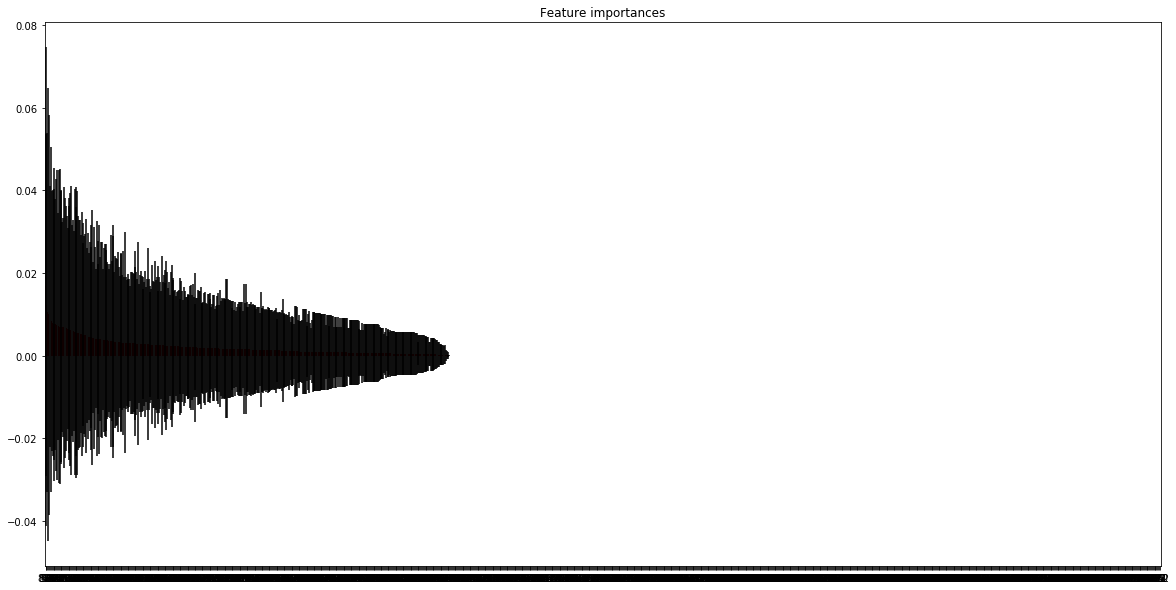

In [8]:
# Set classifier to use for feature importance calculation
forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=0)

# Fit the model
forest.fit(train_values, train_target)
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_values.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(train_values.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train_values.shape[1]), indices)
plt.xlim([-1, train_values.shape[1]])
plt.show()